# Notebook for Pure Production Chemical Reaction Network

Pure production chemical reaction : $ø \xrightarrow{\theta} S$.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import get_fi
import plot
import seaborn
import pandas as pd
from scipy.stats import poisson
import math
import fsp
from typing import Tuple, Callable
from CRN1_pure_production import propensities

## Import data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'pure_production'
NUM_PARAMS = 1

In [3]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

In [4]:
#hyperparameters
LR = 0.005
HIDDEN = 128
N_ITER = 700
BATCHSIZE = 32
MIXTURE = 'NB'

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Neural Network created.


Training ...:  62%|██████▏   | 311/500 [01:01<00:37,  5.05it/s]


Learning rate: 0.0003125,
Train loss: 23.75750160217285,
 Valid loss: 23.887231826782227
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:35<00:00,  5.23it/s]


Learning rate: 0.0025,
Train loss: 0.0031069896649569273,
 Valid loss: 0.0032010513823479414
Neural Network created.


Training ...:  62%|██████▏   | 311/500 [00:53<00:32,  5.82it/s]


Learning rate: 0.0003125,
Train loss: 23.75750160217285,
 Valid loss: 23.887231826782227
Computed loss with 1 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:52<00:00,  4.45it/s]


Learning rate: 0.0025,
Train loss: 0.003192656673491001,
 Valid loss: 0.0032918700017035007
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:48<00:00,  4.60it/s]


Learning rate: 0.0025,
Train loss: 0.0034853885881602764,
 Valid loss: 0.0035986704751849174
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:51<00:00,  4.46it/s]


Learning rate: 0.0025,
Train loss: 0.0031953942961990833,
 Valid loss: 0.003290961030870676
Computed loss with 2 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:13<00:00,  3.73it/s]


Learning rate: 0.0025,
Train loss: 0.003215255681425333,
 Valid loss: 0.0033113383688032627
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:13<00:00,  3.74it/s]


Learning rate: 0.005,
Train loss: 0.00421085674315691,
 Valid loss: 0.004325991962105036
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:08<00:00,  3.87it/s]


Learning rate: 0.00125,
Train loss: 0.002662211423739791,
 Valid loss: 0.0027499916031956673
Computed loss with 3 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:30<00:00,  3.31it/s]


Learning rate: 0.0025,
Train loss: 0.0030334910843521357,
 Valid loss: 0.0031304911244660616
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:31<00:00,  3.29it/s]


Learning rate: 0.0025,
Train loss: 0.003314974019303918,
 Valid loss: 0.0034202509559690952
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:27<00:00,  3.39it/s]


Learning rate: 0.0025,
Train loss: 0.0030955818947404623,
 Valid loss: 0.003194614080712199
Computed loss with 4 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:44<00:00,  3.03it/s]


Learning rate: 0.0025,
Train loss: 0.003151992103084922,
 Valid loss: 0.0032543805427849293
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:47<00:00,  2.99it/s]


Learning rate: 0.0025,
Train loss: 0.0034333486109972,
 Valid loss: 0.0035432963632047176
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:48<00:00,  2.97it/s]


Learning rate: 0.0025,
Train loss: 0.0032298979349434376,
 Valid loss: 0.0033283871598541737
Computed loss with 5 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:06<00:00,  2.67it/s]


Learning rate: 0.0025,
Train loss: 0.003223838284611702,
 Valid loss: 0.0033219200558960438
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:03<00:00,  2.72it/s]


Learning rate: 0.0025,
Train loss: 0.003066191216930747,
 Valid loss: 0.003165941219776869
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:03<00:00,  2.72it/s]


Learning rate: 0.0025,
Train loss: 0.00315317464992404,
 Valid loss: 0.003261854872107506
Computed loss with 6 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [04:01<00:00,  2.07it/s]


Learning rate: 0.0025,
Train loss: 0.0033188911620527506,
 Valid loss: 0.0034287767484784126
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [04:01<00:00,  2.06it/s]


Learning rate: 0.0025,
Train loss: 0.003167414339259267,
 Valid loss: 0.003265863750129938
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:58<00:00,  2.10it/s]


Learning rate: 0.00125,
Train loss: 0.0032501602545380592,
 Valid loss: 0.0033571957610547543
Computed loss with 7 components.


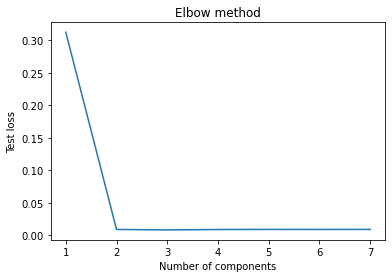

In [5]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE, print_info=False)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE, print_results=False, print_info=False)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Testing loss')
plt.title('Elbow of a curve method')
plt.show()

In [5]:
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [6]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [7]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [13:59<00:01,  1.20s/it]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0015922598540782928,
 Valid loss: 0.001648092526011169


Training ...: 100%|█████████▉| 699/700 [09:47<00:00,  1.19it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016027919482439756,
 Valid loss: 0.0016365195624530315


Training ...:  42%|████▏     | 293/700 [04:04<05:40,  1.20it/s]

Learning rate: 0.0031325858976903294,
Train loss: 0.0022818734869360924,
 Valid loss: 0.0023163629230111837


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.0022818734869360924
Hellinger : 0.02365061268210411

Validation dataset
KLD : 0.0023163629230111837
Hellinger : 0.023847272619605064

Test dataset
KLD : 0.0022840381134301424
Hellinger : 0.023656725883483887


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution :

$$f(x, t, \theta) = \frac{(\theta t)^xe^{-\theta t}}{x!}$$

In [9]:
def pure_production_distribution(x, params):
    t, theta = params[0], params[1]
    return poisson.pmf(x, t*theta)

In [10]:
NAME = 'Pure Production CRN'

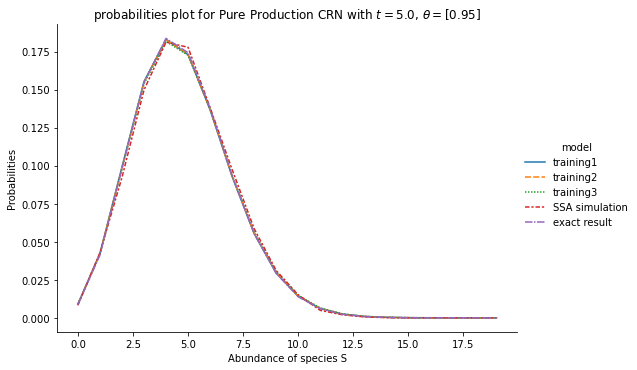

In [39]:
index = 100
plot.plot_model(to_pred=X_test[index, :], 
        models=[model1, model2, model3], 
        up_bound=20,
        n_comps=N_COMPS,
        plot_test_result=(True, y_test[index, :]),
        plot_exact_result=(True, pure_production_distribution),
        crn_name=NAME)

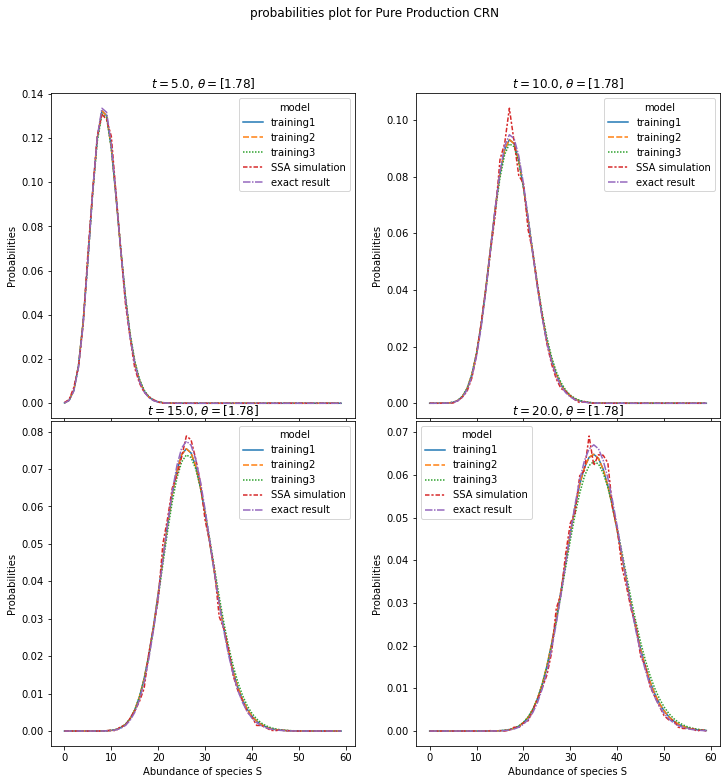

In [40]:
# middle value of the test dataset, save=(True, "4distributions.png")
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
            models=[model1, model2, model3], 
            up_bound=4*[60], 
            n_comps=N_COMPS,
            plot_test_result=(True, [y_test[992+k,:] for k in range(4)]),
            plot_exact_result=(True, pure_production_distribution),
            save=(False, "4distributions.png"),
            crn_name=NAME)

We can check the accuracy for higher times than those of the training :

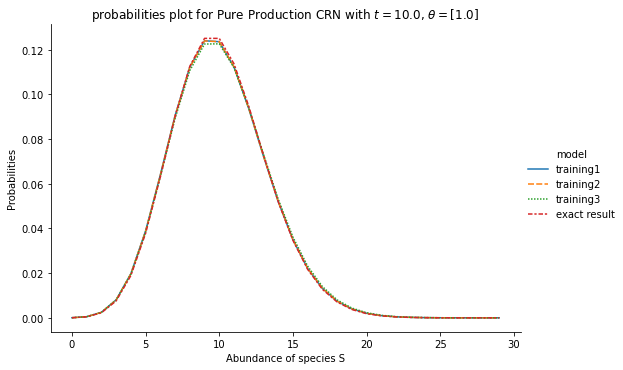

In [42]:
plot.plot_model(to_pred=torch.tensor([10., 1.]), 
        models=[model1, model2, model3], 
        up_bound=30,
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        save=(False, "t10c1.png"),
        crn_name=NAME)

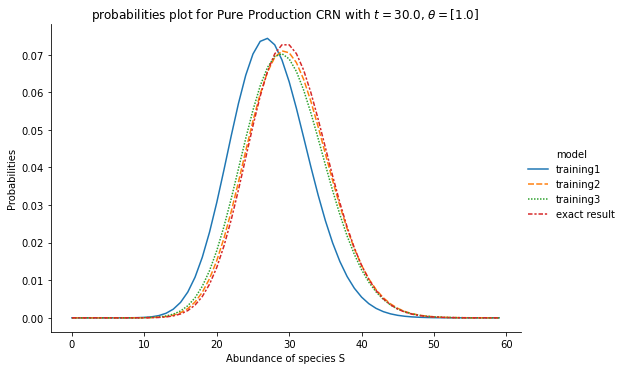

In [43]:
plot.plot_model(to_pred=torch.tensor([30., 1.]),
        models=[model1, model2, model3], 
        up_bound = 60, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        save=(False, "t30c1.png"),
        crn_name=NAME)

We can also check the accuracy for parameters outside the bounds of the training.

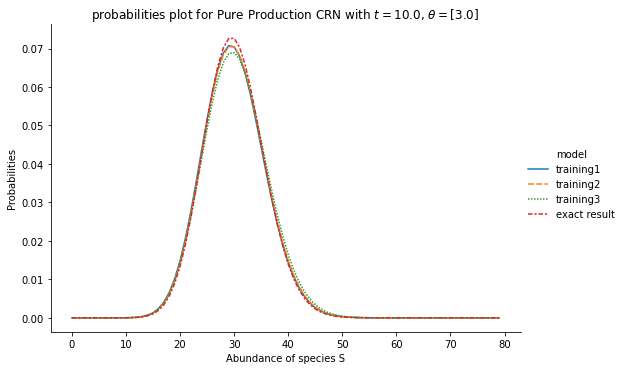

In [59]:
plot.plot_model(to_pred=torch.tensor([10., 3.]), 
        models=[model1, model2, model3], 
        up_bound = 80, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        save=(False, 't10c3.png'),
        crn_name='Pure Production CRN')

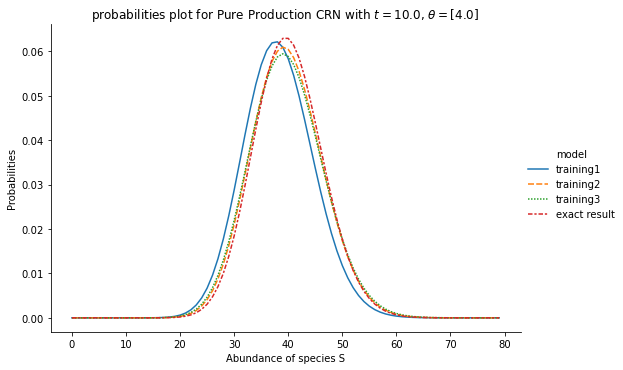

In [49]:
plot.plot_model(to_pred=torch.tensor([10., 4.]), 
        models=[model1, model2, model3], 
        up_bound = 80, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_distribution),
        save=(False, 't10c3.png'),
        crn_name='Pure Production CRN')

## Sentivities plot

To compute sensitivites and compare them to the theoretical ones. 

$$\nabla_{\theta} f(x, t, \theta) = \frac{t^x\theta^{x-1}e^{-\theta t}(x-t\theta)}{x!}

In [50]:
def pure_production_sensitivity(x, params):
    t, theta = params[0], params[1]
    return t * (poisson.pmf(x-1, theta*t) - poisson.pmf(x, theta*t))

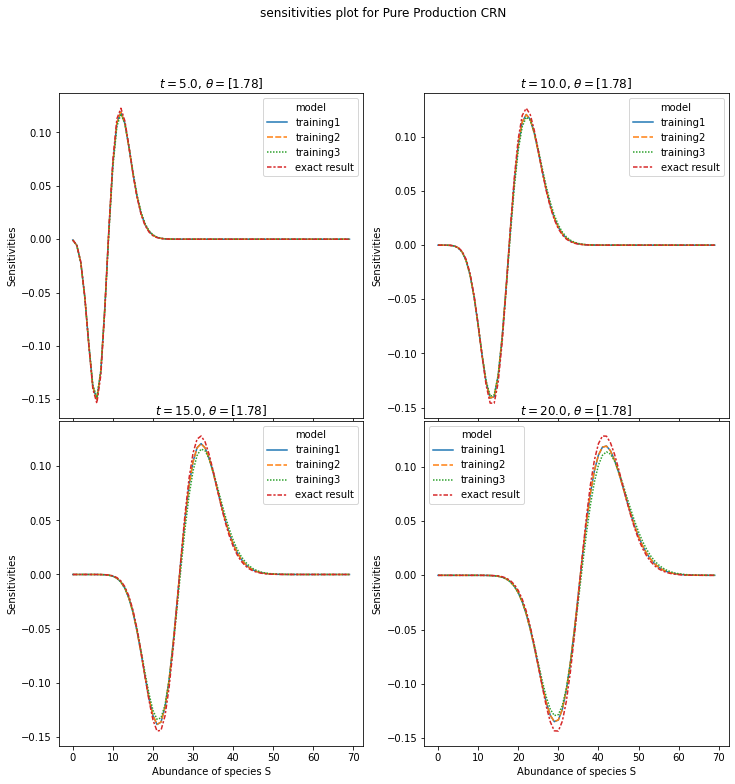

In [52]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                models=[model1, model2, model3], 
                up_bound=[70]*4, 
                n_comps=N_COMPS,
                plot_exact_result=(True, pure_production_sensitivity),
                plot=('sensitivities', 0),
                index_names = ('Sensitivities', 'Abundance of species S'), 
                save=(False, "sensitivities_median.png"),
                crn_name=NAME)

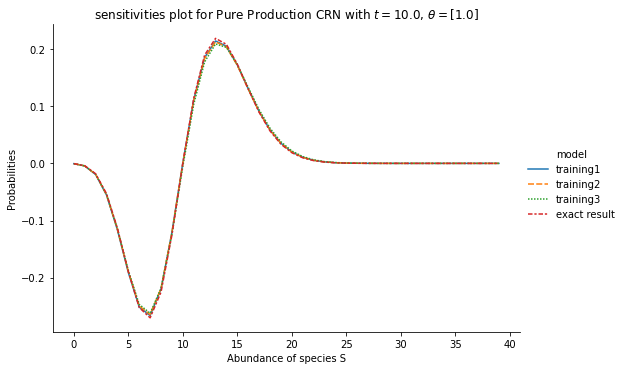

In [54]:
plot.plot_model(to_pred=torch.tensor([10., 1.]), 
        models=[model1, model2, model3], 
        up_bound=40, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, 'sensitivites_t10c1.png'),
        crn_name=NAME)

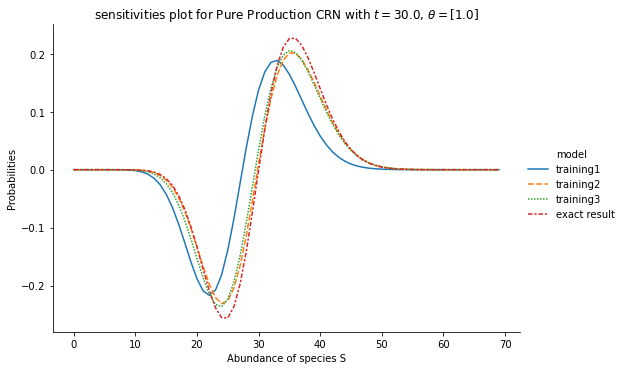

In [55]:
plot.plot_model(to_pred=torch.tensor([30., 1.]), 
        models=[model1, model2, model3], 
        up_bound=70, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, "sensitivities_t30c1.png"),
        crn_name=NAME)

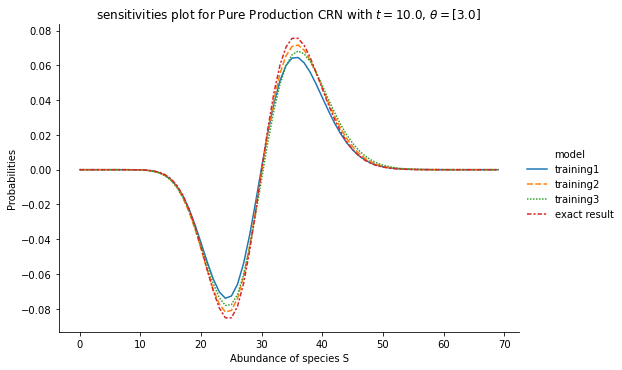

In [60]:
plot.plot_model(to_pred=torch.tensor([10., 3.]),
        models=[model1, model2, model3], 
        up_bound=70, 
        n_comps=N_COMPS,
        plot_exact_result=(True, pure_production_sensitivity),
        plot=('sensitivities', 0),
        index_names = ('Sensitivities', 'Abundance of species S'),
        save=(False, "sensitivities_t10c3.png"),
        crn_name=NAME)

## Fisher information

In [70]:
def exact_fim(t, params, up_bound=500):
    res = 0
    theta = params[0]
    for k in range(up_bound):
        res += (k/theta - t)**2*pure_production_distribution(k, [t, theta])
    return res

/Users/gabriellelancrey-javal/SynologyDrive/ETH/DL_based_Control_of_CRNs/CRN1_pure_production/../plot14.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


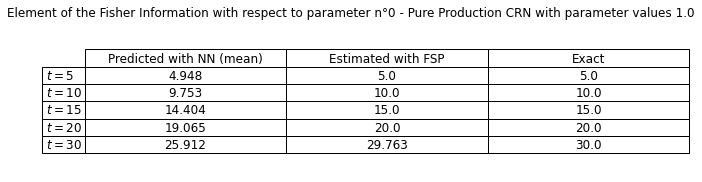

In [79]:
plot.fi_table(time_samples=[5, 10, 15, 20, 30],
        params=torch.tensor([1.]), 
        ind_param=0, 
        models=(True, [model2, model3], N_COMPS), 
        plot_exact=(True, exact_fim),
        plot_fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1]), 50, None),
        up_bound=100,
        crn_name=NAME)

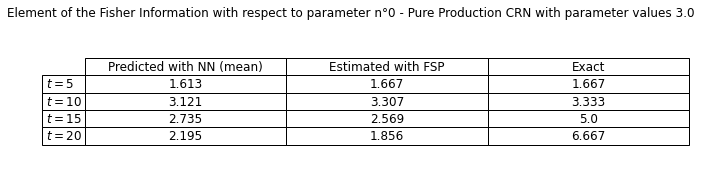

In [80]:
plot.fi_table(time_samples=[5, 10, 15, 20], 
        params=torch.tensor([3.]), 
        ind_param=0, 
        models=(True, [model2, model3], N_COMPS), 
        plot_exact=(True, exact_fim),
        plot_fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1]), 50, None),
        up_bound=100,
        crn_name=NAME)

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_45573/1035999845.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


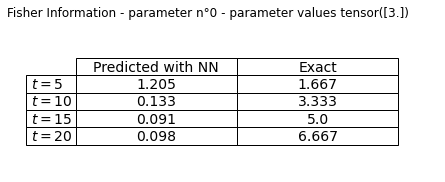

In [17]:
fi_table(time_samples=[5, 10, 15, 20], 
        params=torch.tensor([3.]), 
        ind_param=0, 
        models=(True, [model1, model2, model3], N_COMPS), 
        exact=(True, exact_fim),
        fsp=(True, np.expand_dims(propensities.stoich_mat, axis=0), np.array([propensities.lambda1]), 50, None),
        up_bound=100)